# Modelo machine learning - Classificação de fake news


**Contexto**

Notícias falsas se tornaram um dos maiores problemas de nossa época. Isso tem um sério impacto em nosso discurso online e offline. Pode-se mesmo dizer que, até o momento, as notícias falsas representam um perigo claro e presente para a democracia ocidental e a estabilidade da sociedade.

**Contente**

O que está dentro é mais do que apenas linhas e colunas. Torne mais fácil para outras pessoas começarem descrevendo como você adquiriu os dados e também o período de tempo que eles representam.

**Reconhecimentos**

Não estaríamos aqui sem a ajuda de outras pessoas. Se você deve alguma atribuição ou agradecimento, inclua-os aqui junto com quaisquer citações de pesquisas anteriores.

**Inspiração**

Seus dados estarão em frente à maior comunidade de ciência de dados do mundo. Que perguntas você deseja ver respondidas?

**Base de dados original**
https://www.kaggle.com/hassanamin/textdb3

In [ ]:
!pip install wordcloud

In [1]:
# Versão do python 
from platform import python_version

print("Versão python neste notebook:", python_version())

Versão python neste notebook: 3.9.8


In [2]:
# Bibliotecas do python

import pandas as pd # Biblioteca para carregar dataset
import numpy as np # Manipulação de alegbra linear

# Bibliotecas para visualização de dados
import seaborn 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Carregamento e visualização das bibliotecas e versões 

%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.3.4
matplotlib: 3.4.3
numpy     : 1.19.5
seaborn   : 0.11.2



In [4]:
# configuração dos gráficos e cores, fontes pelo seaborn

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)

color = sns.color_palette()

In [5]:
# Carregando base de dados
# Base de dados

data = pd.read_csv('base/fake_or_real_news.csv')
data

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

In [6]:
# Exibindo os 5 primeiras linhas com o comando head()
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [7]:
# Exibindo os 5 últimos linhas com o comando tail()
data.tail()

Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [8]:
# Exibindo quantidades de linhas e colunas 
data.shape

(6335, 4)

In [9]:
# Exibindo os tipos de dados
data.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [10]:
# Exibindo a info dos dados verificar os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [11]:
# Verificando dados duplicados
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool

In [12]:
# Quantidade de fake e real

total = data.label
print(total.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [13]:
# Verificando na coluna target total de fake, real 
# Dados de nóticias fake e real

noticias = data.label.value_counts
print("Total de nóticias verdadeiros e falso", noticias)

Total de nóticias verdadeiros e falso <bound method IndexOpsMixin.value_counts of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>


In [14]:
# Retorna a variação imparcial
data.var()

Unnamed: 0    9.232506e+06
dtype: float64

In [15]:
# Renomerando as colunas

data.columns = ["ID", "Titulo", "Texto", "Previsão"]
data.head()

ID                                             Titulo  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                               Texto Previsão  
0  Daniel Greenfield, a Shillman Journalism Fello...     FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...     FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...     REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...     FAKE  
4  It's primary day in New York and front-runners...     REAL

In [16]:
# Limpeza base de dados 

import neattext as nt

In [17]:
my_text = "The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI."
my_text

'The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI.'

In [18]:
sentx = nt.TextFrame(text=my_text)
sentx

TextFrame(text="The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI.")

In [19]:
sentx.describe()

Key      Value          
Length  : 195            
vowels  : 60             
consonants: 96             
stopwords: 21             
punctuations: 2              
special_char: 2              
tokens(whitespace): 35             
tokens(words): 37             


In [20]:
sentx.describe()

Key      Value          
Length  : 195            
vowels  : 60             
consonants: 96             
stopwords: 21             
punctuations: 2              
special_char: 2              
tokens(whitespace): 35             
tokens(words): 37             


In [21]:
sentx.remove_puncts()

TextFrame(text="The word “unprecedented” has been thrown around so often this election that it ought to be retired But it’s still unprecedented for the nominee of a major political party to go war with the FBI")

# Análise de dados

Text(0, 0.5, 'Total')

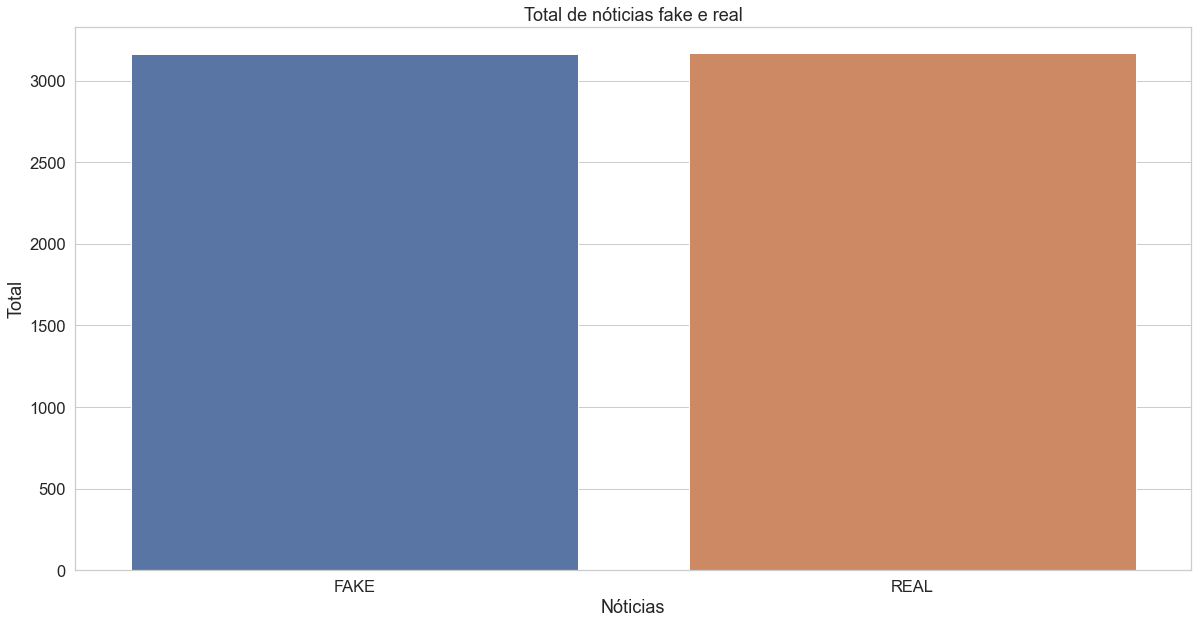

In [22]:
plt.figure(figsize=(20, 10))

plt.title("Total de nóticias fake e real")
ax = sns.countplot(data["Previsão"])
plt.xlabel("Nóticias")
plt.ylabel("Total")

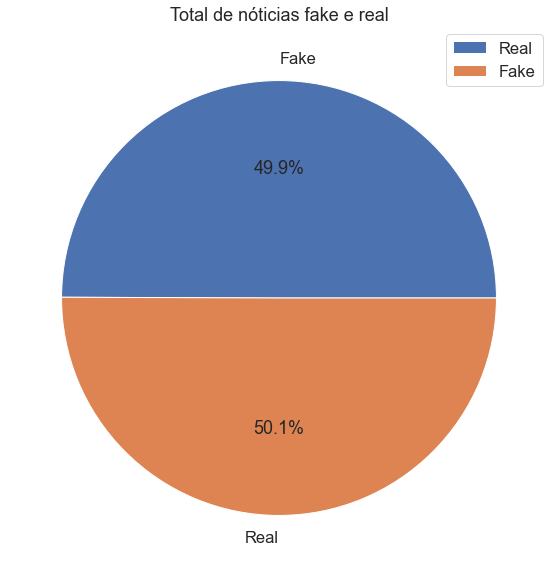

In [23]:
plt.figure(figsize=(20, 10))

plt.pie(data.groupby("Previsão")['Previsão'].count(), labels=["Fake", "Real"], autopct = "%1.1f%%");
plt.title("Total de nóticias fake e real")
plt.legend(["Real", "Fake"])

# Gráfico de nuvem com word cloud
from wordcloud import WordCloud

nuvem_palavras_df = ' '.join([texto for texto in data["Texto"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(nuvem_palavras_df)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

# Pré - processamento dos dados

In [24]:
# Defenindo base de treino e teste train e test

train = data["Texto"]
test = data["Previsão"]

In [25]:
# Visualizando linha e coluna da váriavel test
test.shape

(6335,)

In [26]:
# Visualizando a coluna texto sem limpeza dos textos
data.Texto

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: Texto, Length: 6335, dtype: object

In [27]:
import re
import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
word_lemmatizer = WordNetLemmatizer()

# Lemmatization dos dados
def Lemmatization(inst):
    pal = []
    for x in inst.split():
        pal.append(word_lemmatizer.lemmatize(x))
    return (" ".join(pal))

# Preprocessing base de dados
def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# Negações dos textos
def neg(text):
    neg = ["não", "not"]
    neg_dect = False
    result = []
    pal = text.split()

    for x in pal:
        x = x.lower()
        if neg_dect == True:
            x = x + "_NEG"
        if x in neg:
            neg_dect = True
        result.append(x)
    return ("".join(result))

# stopwords dos textos seperando
def stopwords(inst):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

# stem - stemmer
def stem(inst):
    stem = nltk.stem.RSLPStemmer()
    pal = []
    for x in inst.split():
        pal.append(stemmer.stem(x))
    return (" ".join(pal))

# Limpeza dos dados recomendo instancia de http 
def dados_limp(inst):
    inst = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (inst)

In [29]:
# Dados limpados da coluna texto

train = [Preprocessing(i) for i in train]
train[:1000]

['daniel greenfield, shillman journalism fellow freedom center, new york writer focusing radical islam final stretch election, hillary rodham clinton gone war fbi word “unprecedented” thrown around often election ought retired it’s still unprecedented nominee major political party go war fbi that’s exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillary’s opponent election fbi attack everyone obama cnn hillary’s people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldn’t surprising clintons allies start running attack ads fbi fbi’s leadership warned entire leftwing establishment form lynch mob continue going hillary fbi’s credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obama’s doj people gone explosively public new york times compared comey j edgar hoover bizarre headline, “james com

In [30]:
# Utilizando One hot encoder

from sklearn.preprocessing import OneHotEncoder

HTE = ["Previsão"]

for x in HTE:
    hot = OneHotEncoder()
    data[x] = hot.fit_transform(data[x].values.reshape(-1,1)).toarray()

data.head()

ID                                             Titulo  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                               Texto  Previsão  
0  Daniel Greenfield, a Shillman Journalism Fello...       1.0  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...       1.0  
2  U.S. Secretary of State John F. Kerry said Mon...       0.0  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...       1.0  
4  It's primary day in New York and front-runners...       0.0

# Treino e teste do modelo

- Treino e teste do modelo machine learning
- 80 para dados de treino
- 20 para dados de teste


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 0)

In [32]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train

["senate voted wednesday clear path fund dhs, republicans agreed withdraw immigration restrictions bill tougher get house, member districts homogeneous question, senate majority leader mitch mcconnell (r kentucky blinked came funding department homeland security clock ticking toward dhs shutdown friday night democrats repeatedly blocking debate funding bill contained immigration “poison pills,” senate leader gave democrats wanted wednesday “clean” funding bill, minus toxic measure block president obama’s executive immigration action immigration november taken separately house speaker john boehner (r ohio also blink, bring clean bill – expected pass senate strong bipartisan vote – floor? move would put odds many caucus, possibly prompt challenge leadership weeks struggle dhs funding shown, republican control chambers doesn’t necessarily mean smooth sailing gop even two leaders agree policy – case – work different conditions, chamber political climate ways things majority leader mcconnel

In [33]:
# Total de linhas dos dados de treino y
y_train.shape

(4434,)

In [34]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(1901,)

# Sklearn Tfidf Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.7)
tf_train = tfidf_vectorizer.fit_transform(x_train)
tf_test = tfidf_vectorizer.transform(x_test)

In [36]:
# TfidfVectorizer de colunas e linhas de train

tf_train.shape

(4434, 68219)

In [37]:
# TfidfVectorizer de colunas e linhas de teste

tf_test.shape

(1901, 68219)

# Modelo machine learning

**Modelo 01 - Passive Aggressive Classifier**

In [38]:
%%time
from sklearn.linear_model import PassiveAggressiveClassifier

# Nome do algoritmo M.L
model_passive_aggressive = PassiveAggressiveClassifier(max_iter=50)

# Treinamento do modelo
model_passive_aggressive_fit = model_passive_aggressive.fit(tf_train, y_train)

# Score do modelo
model_passive_aggressive_score = model_passive_aggressive.score(tf_train, y_train)

# Previsão do modelo
model_passive_aggressive_predict = model_passive_aggressive.predict(tf_test)

print("modelo passive aggressive: %.2f" % (model_passive_aggressive_score * 100))

modelo passive aggressive: 100.00
Wall time: 66.1 ms


In [39]:
# Accuracy do modelo - Passive aggressive classifier
from sklearn.metrics import accuracy_score

accuracy_passive_aggressive = accuracy_score(y_test, model_passive_aggressive_predict)
print("Accuracy - Passive aggressive classifier: %.2f" % (accuracy_passive_aggressive * 100))

Accuracy - Passive aggressive classifier: 93.11


In [40]:
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_passive_aggressive_predict)
matrix_confusion

array([[865,  68],
       [ 63, 905]], dtype=int64)

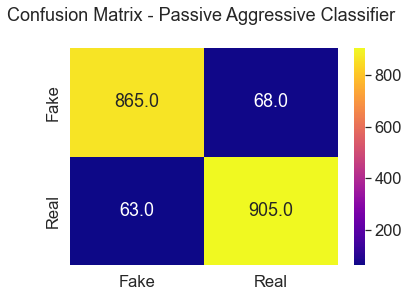

In [58]:
# confusion matrix do passive aggressive classifier
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, model_passive_aggressive_predict)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Passive Aggressive Classifier \n'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);
print()

In [41]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_passive_aggressive_predict)
print("Modelo 01 - Passive Aggressive Classifier")
print()
print(classification)

Modelo 01 - Passive Aggressive Classifier

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       933
        REAL       0.93      0.93      0.93       968

    accuracy                           0.93      1901
   macro avg       0.93      0.93      0.93      1901
weighted avg       0.93      0.93      0.93      1901



**Modelo 02 - Regressão logistica**

In [42]:
%%time
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(tf_train, y_train)
model_lr_score = model_lr.score(tf_train, y_train)
model_lr_pred = model_lr.predict(tf_test)

print("Modelo - Regressão logistica: %.2f" % (model_lr_score * 100))

Modelo - Regressão logistica: 95.62
Wall time: 448 ms


In [43]:
accuracy_regression_logistic = accuracy_score(y_test, model_lr_pred)

print("Accuracy - Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Logistic regression: 91.22


In [44]:
matrix_confusion_2 = confusion_matrix(y_test, model_lr_pred)
matrix_confusion_2

array([[867,  66],
       [101, 867]], dtype=int64)

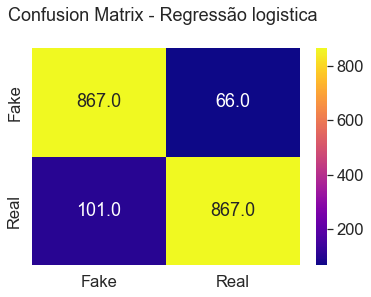

In [45]:
ax= plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Regressão logistica \n'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);
print()

In [46]:
classification = classification_report(y_test, model_lr_pred)
print("Modelo 02 - Regressão logistica")
print()
print(classification)

Modelo 02 - Regressão logistica

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       933
        REAL       0.93      0.90      0.91       968

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



**Modelo 03 - XGBoost**

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_fit = xgb.fit(tf_train, y_train)
xgb_score = xgb.score(tf_train, y_train)
xgb_pred = xgb.predict(tf_test)

print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[21:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 99.71


In [48]:
accuracy_XGBoost = accuracy_score(y_test, xgb_pred)

print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 92.21


In [49]:
matrix_confusion_3 = confusion_matrix(y_test, xgb_pred)
matrix_confusion_3

array([[862,  71],
       [ 77, 891]], dtype=int64)

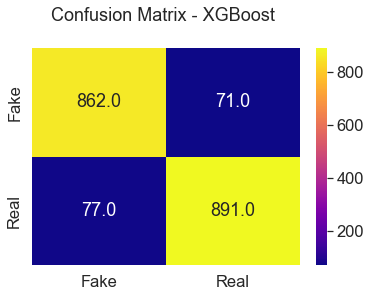

In [50]:
ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - XGBoost \n'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);
print()

In [51]:
classification = classification_report(y_test, xgb_pred)
print("Modelo 03 - XGBoost")
print()
print(classification)

Modelo 03 - XGBoost

              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       933
        REAL       0.93      0.92      0.92       968

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



**Modelo 04 - Gradient Boosting**

In [52]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()
model_gradient_boosting_fit = model_gradient_boosting.fit(tf_train, y_train)
model_gradient_boosting_score = model_gradient_boosting.score(tf_train, y_train)
model_gradient_boosting_pred = model_gradient_boosting.predict(tf_test)

print("Modelo - Gradient Boosting: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Gradient Boosting: 93.28
Wall time: 34.2 s


In [53]:
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)

print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 89.48


In [54]:
matrix_confusion_4 = confusion_matrix(y_test, model_lr_pred)
matrix_confusion_4

array([[867,  66],
       [101, 867]], dtype=int64)

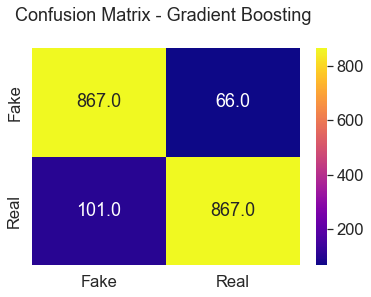

In [55]:
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap="plasma"); 
ax.set_title('Confusion Matrix - Gradient Boosting \n'); 
ax.xaxis.set_ticklabels(["Fake", "Real"]); ax.yaxis.set_ticklabels(["Fake", 'Real']);
print()

In [56]:
classification = classification_report(y_test, xgb_pred)
print("Modelo 03 - XGBoost")
print()
print(classification)

Modelo 03 - XGBoost

              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       933
        REAL       0.93      0.92      0.92       968

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



# Resultado final

In [57]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Passive aggressive", 
                "Regression logistic", 
                "XGBoost", 
                "Gradient boosting"],

    "Acurácia" :[accuracy_passive_aggressive , 
                 accuracy_regression_logistic, 
                 accuracy_XGBoost, 
                 accuracy_model_gradient_boosting]})

modelos.sort_values(by = "Acurácia", ascending = False)

Models  Acurácia
0   Passive aggressive  0.931089
2              XGBoost  0.922146
1  Regression logistic  0.912151
3    Gradient boosting  0.894792